### Phillips curve
##### The Phillips curve is a single-equation economic model, named after William Phillips, hypothesizing an inverse relationship between rates of unemployment and corresponding rates of rises in wages that result within an economy

In [150]:
import os
path = "./data/"
file = os.listdir(path)[0]

#!pip install openpyxl

import numpy as np
import pandas as pd
data = pd.read_excel(path + file, header=None, )

data.columns = ["date", "cpi_kor", "unemploy_kor"]

data = data.drop(index = np.arange(0,5))
data = data.dropna()
data = data.reset_index(drop = True)

data[data.columns[1]] = data[data.columns[1]].astype('float')
data[data.columns[2]] = data[data.columns[2]].astype('float')
data

C:\Users\helco2031752\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,date,cpi_kor,unemploy_kor
0,2000/01,62.456,5.7
1,2000/02,62.647,5.7
2,2000/03,62.962,5.1
3,2000/04,62.709,4.5
4,2000/05,62.393,4.1
...,...,...,...
260,2021/09,103.170,2.7
261,2021/10,103.350,2.8
262,2021/11,103.870,2.6
263,2021/12,104.040,3.5


In [152]:
data["inflation"]=data["cpi_kor"].diff(periods=12)
data = data.dropna()
data = data.reset_index(drop = True)
data

,date,cpi_kor,unemploy_kor,inflation
0,2001/01,64.604,5.1,2.148
1,2001/02,64.919,5.5,2.272
2,2001/03,65.488,5.1,2.526
3,2001/04,65.740,4.1,3.031
4,2001/05,65.677,3.7,3.284
...,...,...,...,...
248,2021/09,103.170,2.7,2.430
249,2021/10,103.350,2.8,3.170
250,2021/11,103.870,2.6,3.780
251,2021/12,104.040,3.5,3.710


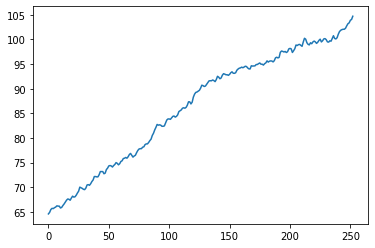

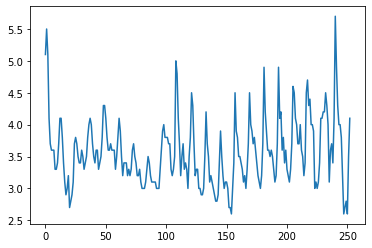

In [159]:
plt.plot(data["cpi_kor"])
plt.show()

plt.plot(data["unemploy_kor"])
plt.show()

In [160]:
import sympy as sym

inflation = sym.Symbol('pi_t')-sym.Symbol('pi_t-1')
unemployment = sym.Symbol('u_t')-sym.Symbol('u_t-1')
a_parameter = sym.Symbol('alpha')

print("Phillips curve")
print("{0}={1}, ({2} > 0)".format(sym.pretty(inflation), sym.pretty(-a_parameter*unemployment), sym.pretty(a_parameter)))

Phillips curve
πₜ - πₜ₋₁=-α⋅(uₜ - uₜ₋₁), (α > 0)


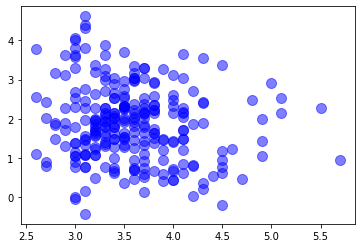

In [161]:
import matplotlib.pyplot as plt
plt.plot(data["unemploy_kor"],  # x
         data["inflation"],  # y
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.show()


In [167]:
corr = data.drop('date', axis = 1).corr(method = "pearson")
a_corr = corr.loc["unemploy_kor", "inflation"]

print("{0} : {1}".format(sym.pretty(a_parameter), round(a_corr,6)))

α : -0.146081
